In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, \
precision_score

# 1. Some subroutines

In [8]:
def get_banking(non_numerical=0):
    # https://www.kaggle.com/code/rashmiranu/banking-dataset-eda-and-binary-classification/notebook
    mydata = pd.read_csv('/Users/nengkuantu/Downloads/new_train.csv')
    
    mydata['y'] = mydata['y'].map(lambda x: 0 if x == "no" else 1)
    mydata.rename({'y': 'label'}, axis = 1, inplace=True)
    
    if(non_numerical == 1):
        mydata = pd.get_dummies(mydata)
    else : 
        mydata = mydata[['age',  'duration', 'campaign', 'pdays', 'previous', 'label']]   
     
    X = mydata.drop(columns=['label']).values

    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X = ss.fit_transform(X)
    
    
    y = mydata['label'].values
    return X, y

In [9]:
get_banking(1)

(array([[ 0.86373877, -0.12019627,  0.52298128, ..., -0.34081462,
          0.39944711, -0.18627755],
        [-0.28972159, -0.2167318 , -0.20368791, ...,  2.93414647,
         -2.50346033, -0.18627755],
        [ 3.65126795,  3.43617293, -0.56702251, ..., -0.34081462,
          0.39944711, -0.18627755],
        ...,
        [ 1.34434725, -0.49089273,  0.52298128, ..., -0.34081462,
          0.39944711, -0.18627755],
        [-1.05869515, -0.3596044 , -0.56702251, ..., -0.34081462,
          0.39944711, -0.18627755],
        [-0.48196498,  1.10387435,  0.15964669, ..., -0.34081462,
          0.39944711, -0.18627755]]), array([0, 0, 1, ..., 0, 0, 0]))

In [10]:
def evaluate(pred, expect) :
    ans = pred - expect
    error_sum = ans.sum()
    n_errors = abs(ans).sum()
    accuracy = 1 - n_errors / expect.shape[0]
    
    return round(accuracy, 3) , n_errors, error_sum

In [23]:
def evaluateConfusion(expect, pred) :
    
    ConfusionMatrix = confusion_matrix(expect, pred)
    f1 = f1_score(expect, pred)
    accuracy = accuracy_score(expect, pred)
    recall = recall_score(expect, pred)
    precision = precision_score(expect, pred)
    
    return f1, accuracy, recall, precision
    
#     return f1, accuracy, recall, precision, ConfusionMatrix

In [12]:
X, y = get_banking(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

X_train.shape

(24712, 58)

In [13]:
default = 1
from sklearn.svm import SVC
results = []
if default :
    SVM = SVC(gamma='scale')
else:
    SVM = SVC(gamma='scale', class_weight='balanced') # default:None, other: balanced
model = SVM
model.fit(X_train, y_train)
pred = model.predict(X_test)
results = results + [['SVM']  + [evaluateConfusion(y_test, pred)]]

results

[['SVM',
  (0.41025641025641024,
   0.9050740470988103,
   0.2962962962962963,
   0.6666666666666666,
   array([[7184,  136],
          [ 646,  272]]))]]

In [27]:
default = 0
from sklearn.svm import SVC
results = []
if default :
    SVM = SVC(gamma='scale')
else:
    SVM = SVC(gamma='scale', class_weight='balanced') # default:None, other: balanced
model = SVM
model.fit(X_train, y_train)
pred = model.predict(X_test)
results = results + [['SVM']  + [evaluateConfusion(y_test, pred)]]

results

[['SVM',
  (0.5631616090331687,
   0.8497208060208788,
   0.8329853862212944,
   0.4253731343283582,
   array([[6202, 1078],
          [ 160,  798]]))]]

# 4. Collect results with Accuracy and Bias

In [7]:
def RunAll(X_train, X_test, y_train, y_test, default = 1) :
    
    # default: 1 for default class_weight (or default weights if KNN)
    # default: 0 forclass_weight = balanced (or weights = 'distance' if KNN)
        
    results = []
    
    from sklearn.tree import DecisionTreeClassifier
    if default :
        DT = DecisionTreeClassifier()
    else:
        DT = DecisionTreeClassifier(class_weight='balanced') # default:None, other: balanced
    model = DT
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['DT', default ] + list( evaluate(pred, y_test))]
    

    from sklearn.ensemble import RandomForestClassifier
    if default :
        RF = RandomForestClassifier(n_estimators =50)
    else:
        RF = RandomForestClassifier(n_estimators =50, class_weight='balanced') # default:None, other: balanced    
    model = RF
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['RF', default] + list( evaluate(pred, y_test))]
    
        
    from sklearn.neighbors import KNeighborsClassifier
    if default :
        KNN = KNeighborsClassifier()
    else:
        KNN = KNeighborsClassifier(weights = 'distance') # default:uniform, other: distance    
    model = KNN
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['KNN', default] + list( evaluate(pred, y_test))]
    
        
    from sklearn.svm import SVC
    if default :
        SVM = SVC(gamma='scale')
    else:
        SVM = SVC(gamma='scale', class_weight='balanced') # default:None, other: balanced
    model = SVM
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['SVM', default ] + list( evaluate(pred, y_test))]
    
    from sklearn.linear_model import LogisticRegression
    if default :
        LogR = LogisticRegression(solver='lbfgs')
    else:
        LogR = LogisticRegression(solver='lbfgs', class_weight='balanced') # default:None, other: balanced
    model = LogR
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['LogR', default] + list( evaluate(pred, y_test))]


    return results


In [8]:
Default = RunAll(X_train, X_test, y_train, y_test, default = 1)

In [9]:
Default

[['DT', 1, 0.869, 1076, -14],
 ['RF', 1, 0.893, 878, -240],
 ['KNN', 1, 0.901, 819, -329],
 ['SVM', 1, 0.907, 764, -478],
 ['LogR', 1, 0.908, 754, -472]]

In [10]:
DefaultDF = pd.DataFrame(Default, columns = ['model', 'weight', 'accuracy', 'N_erros', 'bias'])
DefaultDF 

,model,weight,accuracy,N_erros,bias
0,DT,1,0.869,1076,-14
1,RF,1,0.893,878,-240
2,KNN,1,0.901,819,-329
3,SVM,1,0.907,764,-478
4,LogR,1,0.908,754,-472


In [11]:
Weight = RunAll(X_train, X_test, y_train, y_test, default = 0)
WeightDF =  pd.DataFrame(Weight, columns = ['model', 'weight', 'accuracy', 'N_erros', 'bias'])
WeightDF

,model,weight,accuracy,N_erros,bias
0,DT,0,0.865,1112,8
1,RF,0,0.890,910,-234
2,KNN,0,0.889,915,-205
3,SVM,0,0.829,1412,994
4,LogR,0,0.842,1305,775


## 5. Confusion Matrix
-----
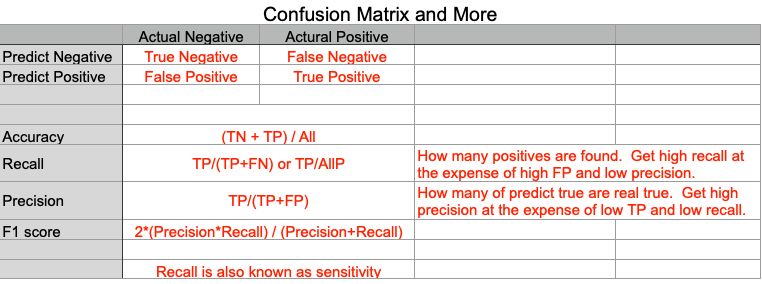


In [14]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, \
precision_score

In [32]:
mydict = {1: 'No_Weight', 0: 'Weight'}
mydict[0]

'Weight'

In [37]:
def RunAllConfusion(X_train, X_test, y_train, y_test, Feature, default = 1) :
    
    # default: 1 for default class_weight (or default weights if KNN)
    # default: 0 forclass_weight = balanced (or weights = 'distance' if KNN)
    
    mydict = {1: 'No_Weight', 0: 'Weight'}
        
    results = []
    
    from sklearn.tree import DecisionTreeClassifier
    if default :
        DT = DecisionTreeClassifier()
    else:
        DT = DecisionTreeClassifier(class_weight='balanced') # default:None, other: balanced
    model = DT
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['DT' ] + [mydict[default], Feature ] + list(evaluateConfusion(y_test, pred))]
#     results = results + [['DT' ] + [evaluateConfusion(y_test, pred)]]
    

    from sklearn.ensemble import RandomForestClassifier
    if default :
        RF = RandomForestClassifier(n_estimators =50)
    else:
        RF = RandomForestClassifier(n_estimators =50, class_weight='balanced') # default:None, other: balanced    
    model = RF
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['RF']  + [mydict[default], Feature ] + list(evaluateConfusion(y_test, pred))]
    
        
    from sklearn.neighbors import KNeighborsClassifier
    if default :
        KNN = KNeighborsClassifier()
    else:
        KNN = KNeighborsClassifier(weights = 'distance') # default:uniform, other: distance    
    model = KNN
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['KNN']  + [mydict[default], Feature ] + list(evaluateConfusion(y_test, pred))]
    
        
    from sklearn.svm import SVC
    if default :
        SVM = SVC(gamma='scale')
    else:
        SVM = SVC(gamma='scale', class_weight='balanced') # default:None, other: balanced
    model = SVM
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['SVM']  + [mydict[default], Feature ] + list(evaluateConfusion(y_test, pred))]
    
    from sklearn.linear_model import LogisticRegression
    if default :
        LogR = LogisticRegression(solver='lbfgs')
    else:
        LogR = LogisticRegression(solver='lbfgs', class_weight='balanced') # default:None, other: balanced
    model = LogR
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['LogR']  + [mydict[default], Feature ] + list(evaluateConfusion(y_test, pred))]


    return results


In [38]:
X, y = get_banking(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

DefaultPF = RunAllConfusion(X_train, X_test, y_train, y_test, 'PF' , default = 1)
WeightPF = RunAllConfusion(X_train, X_test, y_train, y_test , 'PF', default = 0)


X, y = get_banking(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

DefaultFF = RunAllConfusion(X_train, X_test, y_train, y_test , 'FF', default = 1)
WeightFF = RunAllConfusion(X_train, X_test, y_train, y_test, 'FF', default = 0)



In [55]:
ResultsDF = pd.concat([pd.DataFrame(WeightFF), pd.DataFrame(WeightPF),  \
           pd.DataFrame(DefaultFF), pd.DataFrame(DefaultPF)])
ResultsDF.columns = ['model', 'ClassWeight', 'FullOrPartFeatures', 'F1', 'Accuracy', 'Recall', 'Precision']
ResultsDF

,model,ClassWeight,FullOrPartFeatures,F1,Accuracy,Recall,Precision
0,DT,Weight,FF,0.443584,0.877883,0.443094,0.444075
1,RF,Weight,FF,0.433505,0.906409,0.325967,0.646930
2,KNN,Weight,FF,0.379009,0.896577,0.287293,0.556745
3,SVM,Weight,FF,0.542111,0.848871,0.814365,0.406284
4,LogR,Weight,FF,0.550607,0.851784,0.826519,0.412804
0,DT,Weight,PF,0.395433,0.858582,0.394410,0.396462
1,RF,Weight,PF,0.443262,0.885652,0.388199,0.516529
2,KNN,Weight,PF,0.441008,0.881525,0.398551,0.493590
3,SVM,Weight,PF,0.509949,0.823622,0.782609,0.378189
4,LogR,Weight,PF,0.506024,0.835761,0.717391,0.390863


In [56]:
ResultsDF.sort_values('Recall', ascending = False)

,model,ClassWeight,FullOrPartFeatures,F1,Accuracy,Recall,Precision
4,LogR,Weight,FF,0.550607,0.851784,0.826519,0.412804
3,SVM,Weight,FF,0.542111,0.848871,0.814365,0.406284
3,SVM,Weight,PF,0.509949,0.823622,0.782609,0.378189
4,LogR,Weight,PF,0.506024,0.835761,0.717391,0.390863
0,DT,No_Weight,FF,0.457636,0.878004,0.468508,0.447257
0,DT,Weight,FF,0.443584,0.877883,0.443094,0.444075
0,DT,No_Weight,PF,0.412039,0.862467,0.410973,0.413111
1,RF,No_Weight,PF,0.457278,0.888201,0.401656,0.530780
2,KNN,Weight,PF,0.441008,0.881525,0.398551,0.493590
0,DT,Weight,PF,0.395433,0.858582,0.394410,0.396462


In [47]:
ResultDF = pd.concat([pd.DataFrame(WeightFF),pd.DataFrame(WeightPF), \
                      pd.DataFrame(DefaultFF), pd.DataFrame(DefaultPF)])

ResultDF.columns = ['model', 'ClassWeight', 'FullOrPartFeatures', 'F1', 'Accuracy', 'Recall', 'Precision']
ResultDF

,model,ClassWeight,FullOrPartFeatures,F1,Accuracy,Recall,Precision
0,DT,Weight,FF,0.443584,0.877883,0.443094,0.444075
1,RF,Weight,FF,0.433505,0.906409,0.325967,0.646930
2,KNN,Weight,FF,0.379009,0.896577,0.287293,0.556745
3,SVM,Weight,FF,0.542111,0.848871,0.814365,0.406284
4,LogR,Weight,FF,0.550607,0.851784,0.826519,0.412804
0,DT,Weight,PF,0.395433,0.858582,0.394410,0.396462
1,RF,Weight,PF,0.443262,0.885652,0.388199,0.516529
2,KNN,Weight,PF,0.441008,0.881525,0.398551,0.493590
3,SVM,Weight,PF,0.509949,0.823622,0.782609,0.378189
4,LogR,Weight,PF,0.506024,0.835761,0.717391,0.390863


In [48]:
ResultDF.sort_values('Recall', ascending=False)

,model,ClassWeight,FullOrPartFeatures,F1,Accuracy,Recall,Precision
4,LogR,Weight,FF,0.550607,0.851784,0.826519,0.412804
3,SVM,Weight,FF,0.542111,0.848871,0.814365,0.406284
3,SVM,Weight,PF,0.509949,0.823622,0.782609,0.378189
4,LogR,Weight,PF,0.506024,0.835761,0.717391,0.390863
0,DT,No_Weight,FF,0.457636,0.878004,0.468508,0.447257
0,DT,Weight,FF,0.443584,0.877883,0.443094,0.444075
0,DT,No_Weight,PF,0.412039,0.862467,0.410973,0.413111
1,RF,No_Weight,PF,0.457278,0.888201,0.401656,0.530780
2,KNN,Weight,PF,0.441008,0.881525,0.398551,0.493590
0,DT,Weight,PF,0.395433,0.858582,0.394410,0.396462


In [20]:
DefaultPF[4]

['LogR',
 (0.42351168048229093,
  0.9071376547705754,
  0.3118756936736959,
  0.6596244131455399,
  array([[7192,  145],
         [ 620,  281]]))]

In [ ]:
['LogR', 'Weight', 'FF',
 0.42351168048229093,
  0.9071376547705754,
  0.3118756936736959,
  0.6596244131455399]

In [19]:
DefaultFF[4]

['LogR',
 (0.4377564979480164,
  0.9002184996358339,
  0.3357817418677859,
  0.6286836935166994,
  array([[7096,  189],
         [ 633,  320]]))]

In [21]:
WeightPF[4]

['LogR',
 (0.48838095238095236,
  0.8369749939305656,
  0.7114317425083241,
  0.37180974477958234,
  array([[6254, 1083],
         [ 260,  641]]))]

In [22]:
WeightFF[4]

['LogR',
 (0.5519244734931009,
  0.8502063607671765,
  0.7974816369359916,
  0.42198778456413105,
  array([[6244, 1041],
         [ 193,  760]]))]

In [51]:
print((7188+296)/(7188+296+141+613))  # accuracy

0.9084729303228939


In [52]:
print(296/(296+141))  # precision

0.6773455377574371


In [53]:
print(296/ (296 + 613) )  # recall or sensitivity

0.3256325632563256


In [54]:
2*(0.3256325632563256*0.6773455377574371)/(0.3256325632563256+0.6773455377574371)  # f1

0.4398216939078752

In [55]:
Weight = RunAllConfusion(X_train, X_test, y_train, y_test, default = 0)
Weight
# WeightDF =  pd.DataFrame(Weight, columns = ['model', 'weight', 'accuracy', 'N_erros', 'bias'])
# WeightDF

[['DT',
  (0.39113573407202223,
   0.8665938334547221,
   0.38833883388338836,
   0.3939732142857143,
   array([[6786,  543],
          [ 556,  353]]))],
 ['RF',
  (0.4249363867684478,
   0.8902646273367322,
   0.36743674367436746,
   0.5037707390648567,
   array([[7000,  329],
          [ 575,  334]]))],
 ['KNN',
  (0.43273403595784254,
   0.8889293517844137,
   0.38393839383938394,
   0.49573863636363635,
   array([[6974,  355],
          [ 560,  349]]))],
 ['SVM',
  (0.4978662873399715,
   0.8285991745569313,
   0.77007700770077,
   0.3678402522333158,
   array([[6126, 1203],
          [ 209,  700]]))],
 ['LogR',
  (0.49672194369456224,
   0.8415877640203933,
   0.7084708470847084,
   0.3824228028503563,
   array([[6289, 1040],
          [ 265,  644]]))]]

In [43]:
2*(0.7084708470847084*0.3824228028503563)/(0.7084708470847084+0.3824228028503563)

0.49672194369456224

In [27]:
Weight[1:3][1]

['KNN', array([[6974,  560],
        [ 355,  349]])]

In [33]:
WeightDF  = pd.DataFrame(Weight)
print( WeightDF.iloc[:, 0], '\n', WeightDF.iloc[:, 1])

0      DT
1      RF
2     KNN
3     SVM
4    LogR
Name: 0, dtype: object 
 0     [[6783, 558], [546, 351]]
1     [[6989, 559], [340, 350]]
2     [[6974, 560], [355, 349]]
3    [[6126, 209], [1203, 700]]
4    [[6289, 265], [1040, 644]]
Name: 1, dtype: object


In [ ]:
MarkerSizeScale = 20
Markersizearray =np.array([1, 2, 4, 8, 16, 32])
Y_Markersizearray = list(range(40, 24, -3))
for i in ['DT', 'RF', 'KNN', 'SVM', 'LogR' ]:
    plt.figure(figsize=(16,9))
    
    R1 = DefaultDF[DefaultDF.Model == i]
    plt.scatter(R1.LabelRatio, R1.Bias.abs(), s=R1.N_errors*MarkerSizeScale, alpha=0.5)
    
    R0 = WeightDF[WeightDF.Model == i]    
    plt.scatter(R0.LabelRatio, R0.Bias.abs(), s=R0.N_errors*MarkerSizeScale, alpha=0.5)
    
    plt.legend(['class weight = None', 'class weight =  balanced'], fontsize=16)
    
    
    plt.title('model ' + i + ' :The circle size indicates the error count.',  fontsize=30)
    plt.xlabel('Label Ratio.  Well balanced ratio is equal to 1.', fontsize=24)
    plt.ylabel('bias.  0 means no bias', fontsize=24)
    
    plt.show()
